In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

### Analize the lifespan changing the seed (for fixed dimension and nativity)

In [ ]:
occupazioni = ['125', '250', '375', '500', '625']
dimensioni = ['15']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30, 5))

analisi = 'lifespan'
i = 0
print()
for occ in occupazioni:
    for griglia in dimensioni:
        data = []
        filename = "vite/" + analisi + "_" + griglia + "_" + occ + ".txt"
        filein = open(filename, 'r')
        for line in filein:
            data.append(float(line))
        
        title = "Lifespan with a grid " + griglia + "*" + griglia + " and nativity = " + str(int(occ)/10) + "%"
        ax = axes[i]
        ax.hist(data, bins='auto')
        ax.set_xlabel("lifespan")
        ax.set_ylabel("counts")
        ax.title.set_text(title)
        i += 1
    
plt.savefig("plot_analisys/lifespan.png")


In [ ]:
occupazioni = ['125', '250', '375', '500', '625']
dimensioni = ['15']

def exponential(x, const, height, position):
    return const + height*np.e**(-x + position)

analisi = 'lifespan'
i = 0
print()
for occ in occupazioni:
    for griglia in dimensioni:
        data = []
        filename = "vite/" + analisi + "_" + griglia + "_" + occ + ".txt"
        filein = open(filename, 'r')
        for line in filein:
            data.append(float(line))
        
        title = "Lifespan with a grid " + griglia + "*" + griglia + " and nativity = " + str(int(occ)/10) + "%"
        n, bins = np.histogram(data, bins='auto')

        bins = (bins[:-1] + bins[1:])/2

        n_fit= np.log(n[list(n).index(max(n)):list(n).index(0)])
        bin_fit = bins[list(n).index(max(n)):list(n).index(0)]

        params, covariance = np.polyfit(bin_fit, n_fit, deg=1, full=False, cov=True)

        X = np.linspace(min(bin_fit), 1000, 1000)
        plt.plot(X, np.exp(params[0]*X + params[1]))

        
        # plt.plot(bins, n, drawstyle='steps-mid')
        # plt.bar(bins, n, alpha=0.5, color='r', width=100(1000//len(bins)))
        plt.hist(data, bins=len(bins), alpha=0.5)
        plt.xlabel("lifespan")
        plt.ylabel("counts")
        plt.title(title)
        nomefile = 'plot_analisys/lifespan_fit_' + occ + '.png'
        plt.savefig(nomefile)
        plt.show()
        i += 1




In [ ]:
occupazioni = ['125', '250', '375', '500', '625']
dimensioni = ['15']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30, 5))

analisi = 'periodicity'
i = 0
print()
for occ in occupazioni:
    for griglia in dimensioni:
        data = []
        filename = "vite/" + analisi + "_" + griglia + "_" + occ + ".txt"
        filein = open(filename, 'r')
        for line in filein:
            data.append(float(line))
        
        title = "Lifespan with a grid " + griglia + "*" + griglia + " and nativity = " + str(int(occ)/10) + "%"
        ax = axes[i]
        ax.hist(data, bins='auto')
        ax.set_xlabel("lifespan")
        ax.set_ylabel("counts")
        ax.title.set_text(title)
        i += 1
    
plt.savefig("plot_analisys/periodicity.png")

One can see that the periodicity is always 1 (game frozen on a stati c configuration) or 2 (due to the presence of oscillators of period 2). But there are also periodicity of 60 (due to the presence of a glider. ex: seed=1020 native=12.5)

### Asymptotic occupancy as a function of the dimension of the grid

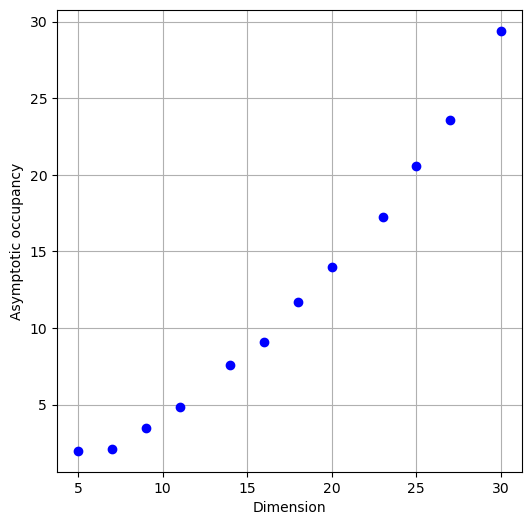

In [27]:
data = np.loadtxt("dims_vs_occ2.txt")

dataX, dataY,sigmaY = data[:,0],data[:,1],data[:,2]
sigmaY = sigmaY / np.sqrt(200)#error of mean
y_scaled = np.array([dataY[i]/(dataX[i]**2) for i in range(len(dataX))])
xs = np.linspace(5,1000,1000)

fig, ax = plt.subplots(nrows=1,ncols=1)
ax.figure.set_size_inches(6,6)
ax.set_xlabel("Dimension")
ax.set_ylabel("Asymptotic occupancy")
ax.grid()
plt.plot(dataX,dataY,"bo", label = "data")

We expect it to grow quadratically (due to the fact that the size of the grid grows quadratically), so we perform a linear fit on the area

In [28]:
dataX = dataX**2 #squared sizes

def f(x,a,b):
    return a*x+b
params, params_covariance = optimize.curve_fit(f, dataX, dataY, sigma = sigmaY, p0=[0.03, 0])

print(params)
print(covariance)

[0.03172549 0.94466436]
[[ 8.53383827e-08 -2.16515668e-05]
 [-2.16515668e-05  7.30952159e-03]]


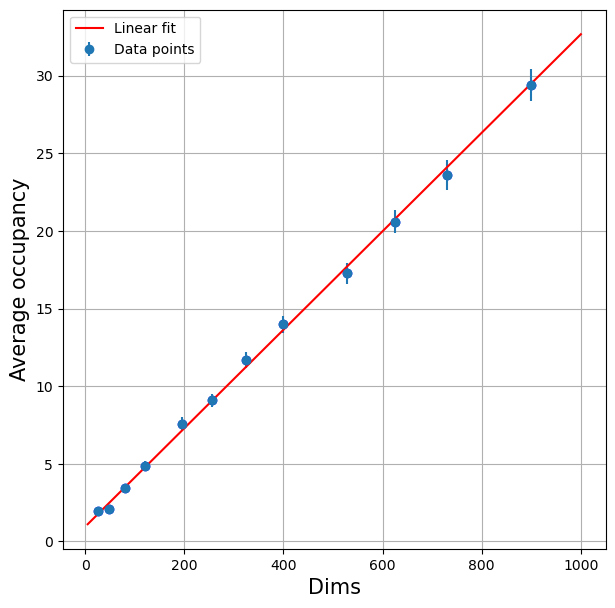

In [25]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Dims", fontsize=15)
ax.set_ylabel("Average occupancy",fontsize=15)
ax.plot(dataX,dataY,"bo")

ax.errorbar(dataX, dataY, yerr = sigmaY,fmt = "o", label = "Data points")
ax.plot(xs, f(xs,params[0],params[1]), "r", label = "Linear fit")
ax.grid()
ax.legend()
plt.savefig("linear_fit.png")

### Nativity with respect to occupancy

In [ ]:
data = np.loadtxt("nativity_vs_occupancy.txt")

In [ ]:
nativities = data[:,0]
occupancies = data[:,1]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Nativity", fontsize = 15)
ax.set_ylabel("Asymptotic occupancy", fontsize = 15)
ax.grid()

ax.plot(nativities,occupancies/15**2, "bo", label = "Data", alpha = 0.5)
ax.legend()
plt.savefig("nativity_occupancy.png")
#run with 300 seeds for each nativity

The behaviour of the data we found is very similar to the one  described [in the following paper](https://www.sciencedirect.com/science/article/abs/pii/037843719190277J) and described in the following image

In [ ]:
img = plt.imread("figures/nativity_occupancy.jpg")
plt.axis("off")
plt.imshow(img)
plt.show()

# Lifespan vs nativity

In this cell we plot the average lifespan for each nativity value considered.


In [ ]:
data = np.loadtxt("nativities/mean_evaluated.txt")
nativities = data[:,0]
lifespans = data[:,1]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.plot(nativities,lifespans,"ro",label="Data", alpha = 0.5)
ax.grid()
ax.set_xlabel
plt.show()